This lecture note is based on "An Introduction to NUMERICAL ANALYSIS" (2nd Edition) <br> by Kendall E. Atkinson


# Chapter 2. ROOTFINDING FOR NONLINEAR EQUATIONS

***
**Definition** &emsp; A sequence of iterates $\{x_n\ |\ n \ge 0\}$ is said to converge with *order* $p\ge 1$ to a point $\alpha$ if

$$|\alpha - x_{n+1}| \le c|\alpha - x_n|^p \qquad n\ge 0$$

for some $c>0$.
If $p=1$, the sequence is said to *converge linearly* to $\alpha$.
In that case, we require $c<1$; the constant $c$ is called the *rate of linear convergence* of $x_n$ to $\alpha$.

## 2.1 The Bisection Method

Assume that $f(x)$ is continuous on $[a,b]$ and that it also satisfies

$$f(a) f(b) < 0.$$

Using `Theorem 1.1 (Intermidiate Value)`, the function $f(x)$ must have at least one root in $[a,b]$.

***
**Algorithm** &emsp; Bisect ($f,\ a,\ b,\ \text{root}, \epsilon$) 

1. Define $c:= (a+b)/2$. <br>

2. If $b-c\le \epsilon$, then accept root$:= c$, and exit. <br>

3. If sign$(f(b))\cdot$ sign$(f(c))\le 0$, then $a:= c$; otherwise, $b:= c$. <br>

4. Return to step 1.
***

Implement Bisect($f,a,b,\text{root},\epsilon$)

In [1]:
import numpy as np
def bisect(f,a,b,epsilon):
    root = []
    while 1:
        c = (a + b) / 2
        root.append(c)
        
        if b-c<=epsilon: return root
        
        if f(b)*f(c) <= 0:
            a = c
        else:
            b = c

In [2]:
f = lambda x: x**2 - 2
root = bisect(f,1,2,1e-10)
print(root)

[1.5, 1.25, 1.375, 1.4375, 1.40625, 1.421875, 1.4140625, 1.41796875, 1.416015625, 1.4150390625, 1.41455078125, 1.414306640625, 1.4141845703125, 1.41424560546875, 1.414215087890625, 1.4141998291015625, 1.4142074584960938, 1.4142112731933594, 1.4142131805419922, 1.4142141342163086, 1.4142136573791504, 1.4142134189605713, 1.4142135381698608, 1.4142135977745056, 1.4142135679721832, 1.414213553071022, 1.4142135605216026, 1.414213564246893, 1.4142135623842478, 1.4142135614529252, 1.4142135619185865, 1.4142135621514171, 1.4142135622678325, 1.4142135623260401]


In [3]:
np.abs(root - np.sqrt(2))

array([8.57864376e-02, 1.64213562e-01, 3.92135624e-02, 2.32864376e-02,
       7.96356237e-03, 7.66143763e-03, 1.51062373e-04, 3.75518763e-03,
       1.80206263e-03, 8.25500127e-04, 3.37218877e-04, 9.30782519e-05,
       2.89920606e-05, 3.20430957e-05, 1.52551753e-06, 1.37332715e-05,
       6.10387700e-06, 2.28917974e-06, 3.81831103e-07, 5.71843213e-07,
       9.50060552e-08, 1.43412524e-07, 2.42032343e-08, 3.54014105e-08,
       5.59908808e-09, 9.30207311e-09, 1.85149251e-09, 1.87379778e-09,
       1.11526344e-11, 9.20169940e-10, 4.54508653e-10, 2.21678009e-10,
       1.05262687e-10, 4.70550265e-11])

<span style="color:blue">[Speed of convergence]</span> Let $c_n$ denote the $n$th value of $c$ in the algorithm.
Then

$$\alpha = \lim_{n\rightarrow \infty} c_n, $$

$$|\alpha - c_n| \le \left[\frac{1}{2}\right]^n (b-a).$$

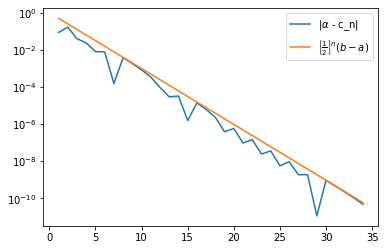

In [11]:
import matplotlib.pylab as plt
%matplotlib inline

xx = np.arange(1,(len(root)+1))
plt.semilogy(xx,np.abs(root-np.sqrt(2)), label=r'|$\alpha$ - c_n|')
plt.semilogy(xx, (1/2)**(xx), label=r'$\left[\frac{1}{2}\right]^n (b-a)$')
plt.legend()
plt.show()

### Major problem

- Bisect converges very slowly when compared with other methods.
<br>

### Major advantages

- it is guaranteed to converge.<br>

- at each step, upper and lower bounds of the root $\alpha$ are available: *enclosure method*

## 2.2 Newton's Method

### Geometric approach

1. Assume an initial estimate $x_0$ is close to the desired root $\alpha$. <br>

2. Approximate the graph of $y = f(x)$ in the vicinity of its root $\alpha$ by constructing its tangent line at $(x_0, f(x_0))$. <br>

3. Use the root of this tangent line to approximate $\alpha$; call this new approximation $x_1$. <br>

4. Repeat this process to obtain a sequence of iterates $x_n$. <br>

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} \qquad n\ge 0$$

### Taylor's expansion

Assume $f\in \mathcal{C}^2([a,b])$. Consider the Taylor's expansion of $f$:

$$f(x) = f(x_n) + (x-x_n) f'(x_n) + \frac{(x-x_n)^2}{2!}f''(\xi),$$

where $\xi$ is in between $x$ and $x_n$.
Letting $x=\alpha$ and using $f(\alpha) = 0$,

$$0 = f(\alpha) = f(x_n) + (\alpha - x_n)f'(x_n) + \frac{(\alpha - x_n)^2}{2!}f''(\xi)$$

$$\Rightarrow \quad \alpha = x_n - \frac{f(x_n)}{f'(x_n)} -  \frac{(\alpha - x_n)^2}{2!}\frac{f''(\xi)}{f'(x_n)}.$$

### Taylor's expansion

Assume $f'(\alpha) \neq 0$. Let

<span style="color:red">$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}, \qquad n\ge 1 \ : \ \text{Newton's method}$$</span>

then

$$\alpha - x_{n+1} = -(\alpha - x_n)^2 \frac{f''(\xi)}{2f'(x_n)}, \quad x\ge 1.$$

***
**Theorem 2.1** &emsp; Assume $f(x),\ f'(x),$ and $f''(x)$ are continuous for all $x$ in some neighborhood of $\alpha$, and assume $f(\alpha) = 0,\ f'(\alpha) \neq 0$. 
Then if $x_0$ is chosen sufficiently close to $\alpha$, the iterates $x_n,\ n\ge 0$, of <span style="color:red">Newton's method</span> will converge to $\alpha$. 
Moreover,

$$\lim_{n\rightarrow \infty} \frac{\alpha - x_{n+1}}{(\alpha - x_n)^2} = -\frac{f''(\alpha)}{2f'(\alpha)}$$

proving that the iterates have an order of convergence $p = 2$.
***

<span style=color:blue> [Speed of convergence] </span> If $x_0$ is close enough to $\alpha$ (and $f'\neq 0$ on $[a,b]$) then we have

$$|\alpha - x_{n+1}| \le c|\alpha - x_n|^2 \ : \ \text{quadratic convergence}$$

### Major advantage

- if it converges, it generally does so quite rapidly <br>

### Major disadvantage

- it may not converge (choosing correct initial guess, ...) <br>

- the necessity of knowing $f'(x)$ explicitly, which may not always possible

***
**Algorithm** &emsp; Newton ($f,\ df,\ x_0,\ \epsilon, \ \text{root}, \ \text{itmax},\ \text{ier}$) 

1. Remark: $df$ is the derivative function $f'(x)$, itmax is the maximum number of iterates to be computed, and ier is an error flag to the user. <br>

2. itnum$:= 1$ <br>

3. denom$:= df(x_0)$ <br>

4. If denom$=0$, then ier$:=2$ and exit. <br>

5. $x_1 := x_0 - f(x_0)/$denom <br>

6. If $|x_1 - x_0| \le \epsilon$, then set ier$:=0$, root$:= x_1$, and exit. <br>

7. If itnum$=$itmax, set ier$:=1$ and exit. <br>

8. Otherwise, itnum$:=$itnum +1, $x_0 := x_1$, and go to step 3.
***

Implement Newton($f,df,x_0,\epsilon,\text{root,itmax,ier}$)

In [ ]:
def newton(f,df,x0,epsilon,itmax):
    return(root, ier)

In [ ]:
f = lambda x: x**2 - 2
df = lambda x: 2*x
root, ier = newton(f,df,2,1e-10,10)
print(root, ier)

In [ ]:
np.abs(root - np.sqrt(2))

In [ ]:
import matplotlib.pylab as plt
%matplotlib inline

xx = np.arange(1,(len(root)+1))
plt.semilogy(xx,np.abs(root-np.sqrt(2)), label=r'|$\alpha$ - c_n|')
plt.legend()
plt.show()

In [ ]:
np.log(np.abs(np.sqrt(2)- root[1:-1]))/np.log(np.abs(np.sqrt(2)-root[0:-2]))

## 2.3 The Secant Method

Using the slope formula with the secant line,

$$\frac{f(x_1)-f(x_0)}{x_1 - x_0} = \frac{f(x_1) - 0}{x_1 - x_2}$$
<br>

Solving for $x_2$

$$x_2 = x_1 - f(x_1)\cdot\frac{x_1 - x_0}{f(x_1) - f(x_0)}$$

### Secant method

<span style="color:red">$$x_{n+1} = x_n - f(x_n)\cdot\frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})} \qquad n\ge 1$$</span>

### Error analysis

From the secant method

\begin{align}
\alpha - x_{n+1} &= \alpha - x_n + f(x_n)\cdot\frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})} \\
&= -(\alpha - x_{n-1})(\alpha - x_n)\frac{f[x_{n-1},x_n,\alpha]}{f[x_{n-1},x_n]} \\
&= -(\alpha - x_{n-1})(\alpha - x_n)\frac{f''(\zeta_n)}{2f'(\xi_n)}
\end{align}

with $\xi_n$ between $x_{n-1}$ and $x_n$, and $\zeta_n$ between $x_{n-1},\ x_n,$ and $\alpha$.

***
**Theorem 2.3** &emsp; Assume $f(x),\ f'(x),$ and $f''(x)$ are continuous for all values of $x$ in some interval containing $\alpha$, and assume $f'(\alpha)\neq 0$. Then if the initial guesses $x_0$ and $x_1$ are chosen sufficiently close to $\alpha$, the iterates $x_n$ of <span style="color:red">the secant method</span> will converge to $\alpha$. The order of convergence will be $p = (1 + \sqrt{5})/2 \approx 1.62$.
***

### Major advantage

- if it converges, it is faster than the bisection method <br>

- it does not require a kowledge of $f'(x)$

### Major disadvantage

- it may not converge (choosing correct initial guess, ...) <br>

- it is slower than Newton's method

### Comparison of Newton's method and the secant method

- Newton's method requires two function evaluations per iterate, that of $f(x+n)$ and $f'(x_n)$ whereas the secant method requires only one function evaluation per iterate, that of $f(x_n)$ ($f(x_{n=1})$ is retained from the previous iteration): <span style='color:red'> Newton's method is generally more expensive per iteration.</span> <br>

- Newton's method converges more rapidly

***
**Algorithm** &emsp; Secant ($f,\ x_0,\ x_1, \ \epsilon, \ \text{root}, \ \text{itmax},\ \text{ier}$) 

1. Remark: itmax is the maximum number of iterates to be computed, and ier is an error flag to the user. <br>

2. itnum$:= 1$ <br>

3. slope$:= (f(x_1) - f(x_0))/(x_1 - x_0)$ <br>

4. If slope$=0$, then ier$:=2$ and exit. <br>

5. $x_2 := x_1 - f(x_1)/$slope <br>

6. If $|x_2 - x_1| \le \epsilon$, then set ier$:=0$, root$:= x_2$, and exit. <br>

7. If itnum$=$itmax, set ier$:=1$ and exit. <br>

8. Otherwise, itnum$:=$itnum +1, $x_0 := x_1$, $x_1 = x_2$ and go to step 3.
***

Implement secant($f,x_0,x_1,\epsilon,\text{root,itmax,ier}$)

In [ ]:
def secant(f,x0,x1,epsilon,itmax):
    return(root, ier)

In [ ]:
import numpy as np
f = lambda x: x**2 - 2
root, ier = secant(f,2,1,1e-10,10)
print(root, ier)

In [ ]:
np.abs(root - np.sqrt(2))

In [ ]:
import matplotlib.pylab as plt
%matplotlib inline

xx = np.arange(1,(len(root)+1))
plt.semilogy(xx,np.abs(root-np.sqrt(2)), label=r'|$\alpha$ - c_n|')
plt.legend()
plt.show()

In [ ]:
np.log(np.abs(np.sqrt(2)- root[1:-1]))/np.log(np.abs(np.sqrt(2)-root[0:-2]))

## 2.5 A General Theory for One-Point Iteration Methods

Consider solving an equation $x = g(x)$ for a root $\alpha$ by the iteration

$$x_{n+1} = g(x_n),\qquad n\ge 0$$

with $x_0$ an initial guess to $\alpha$. <br><br>

Each solution of $x = g(x)$ is called a *fixed point* of $g$.

***
**Lemma 2.5** &emsp; Let $g(x)$ be continuous on $[a,b]$, and assume $g([a,b])\subset[a,b]$.
Furthermore, assume there is a constant $0<\lambda<1$, with

$$|g(x) - g(y)| < \lambda|x-y| \qquad \text{for all} \quad x,\ y \in [a,b]$$

Then $x = g(x)$ has a unique solution $\alpha$ in $[a,b]$. Also, the iterates

$$x_n = g(x_{n-1}) \qquad n\ge 1$$

will converge to $\alpha$ for any choice of $x_0$ in $[a,b]$, and

$$|\alpha - x_n| \le \frac{\lambda^n}{1 -\lambda}|x_1-x_0|$$
***

***
**Theorem 2.6** &emsp; Assume that $g(x)$ is continuously differentiable on $[a,b]$, that $g([a,b]) \subset [a,b]$, and that

$$ \lambda = \max_{a\le x\le b} |g'(x)| < 1$$

Then

(i) $x=g(x)$ has a unique solution $\alpha$ in $[a,b]$ 

(ii) For any choice of $x_0$ in $[a,b]$, with $x_{n+1} = g(x_n),\ n\ge 0,$

$$ \lim_{n\rightarrow\infty} x_n = \alpha$$

(iii)
$$|\alpha - x_n| \le \lambda^n |\alpha - x_0| \le \frac{\lambda^n}{1-\lambda}|x_1 - x_0|$$
$$\lim_{n\rightarrow\infty}\frac{\alpha- x_{n+1}}{\alpha- x_n} = g'(\alpha)$$